# **SCM256 Project - Amazon Exploratory Data Analysis**

This notebook performs exploratory data analysis on Amazon Grocery & Gourmet Food Reviews dataset. The analysis includes:
1. Data cleaning and preprocessing
2. Basic statistical analysis
3. Temporal analysis of reviews
4. Text analysis and visualization
5. Sentiment distribution analysis

The final goal is to prepare the data for sentiment analysis using NLP techniques.

## Setting up the environment

We'll import necessary packages for data manipulation, visualization, and text processing.

In [4]:
# import json

# # Input and output settings
# input_file = "/home/gridsan/kpower/BERT_for_Amazon_Expanded/Grocery_and_Gourmet_Food.jsonl" # Update with your actual file path
# output_prefix = "part_"  # Prefix for split files
# lines_per_file = 500000  # Adjust based on memory

# # Open the large JSONL file and split it
# with open(input_file, "r", encoding="utf-8") as infile:
#     file_count = 0
#     outfile = open(f"{output_prefix}{file_count}.jsonl", "w", encoding="utf-8")

#     for i, line in enumerate(infile):
#         if i > 0 and i % lines_per_file == 0:
#             outfile.close()  # Close current file and open a new one
#             file_count += 1
#             outfile = open(f"{output_prefix}{file_count}.jsonl", "w", encoding="utf-8")

#         outfile.write(line)

#     outfile.close()  # Close the last file


### Import packages

In [5]:
#general purpose packages
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import tensorflow as tf

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")

### Import data

Loading the Amazon reviews dataset from local storage.

In [6]:
df = pd.read_json("/home/gridsan/kpower/BERT_for_Amazon_Expanded/part_0.jsonl", lines=True)

In [7]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5,Excellent! Yummy!,Excellent!! Yummy! Great with other foods and...,[],B00CM36GAQ,B00CM36GAQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:41:22.395,0,True
1,5,Delicious!!! Yum!,Excellent! The best! I use it with my beef a...,[],B074J5WVYH,B0759B7KLH,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:40:00.380,0,True
2,5,"Extremely Delicious, but expensive imo",These are very tasty. They are extremely soft ...,[],B079TRNVHX,B079TRNVHX,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-04-25 22:20:24.527,1,True
3,5,Delicious!,My favorite!,[],B07194LN2Z,B07194LN2Z,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:59.614,0,True
4,5,Great taste,Great for making brownies and crinkle cookies.,[],B005CD4196,B005CD4196,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-10 05:41:34.965,7,True


## Data Exploration and Quality Analysis

We'll start by examining the dataset structure, checking for missing values, and understanding the basic characteristics of our data.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             500000 non-null  int64         
 1   title              500000 non-null  object        
 2   text               500000 non-null  object        
 3   images             500000 non-null  object        
 4   asin               500000 non-null  object        
 5   parent_asin        500000 non-null  object        
 6   user_id            500000 non-null  object        
 7   timestamp          500000 non-null  datetime64[ns]
 8   helpful_vote       500000 non-null  int64         
 9   verified_purchase  500000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(6)
memory usage: 34.8+ MB


In [9]:
df.tail()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
499995,5,DEE-LICIOUS!,"Oh, this salt is awesome! ...and the bonus is ...",[],B001ROJ3FQ,B07VF7QDZP,AEKPKHHMT4WWVJFPOSUUACNBUFDA,2014-12-30 19:46:48.000,5,True
499996,4,GREAT BUT LIGHTER IN COLOR,"I'm sure this organic cacao is healthier and, ...",[],B00HES9CMS,B09XD51C5M,AEKPKHHMT4WWVJFPOSUUACNBUFDA,2014-12-30 19:32:59.000,0,True
499997,5,Five Stars,"Great value for organic, raw nibs!",[],B00DLMVHQ0,B07WXJSGRC,AEKPKHHMT4WWVJFPOSUUACNBUFDA,2014-07-29 12:54:18.000,0,False
499998,5,Yummy,Yummy,[],B07985Z8YM,B07985Z8YM,AH6G6P6JMIKADDDQAZYO5B4F3U7A,2020-03-13 13:30:47.753,1,True
499999,5,Very tasty,Very tasty,[],B07JDKPQTS,B07JDKPQTS,AH6G6P6JMIKADDDQAZYO5B4F3U7A,2020-03-13 13:30:09.965,0,True


In [10]:
print("DataFrame Shape:", df.shape)              # Rows x Columns
print("\nColumn Names:", df.columns)             # List column names
print("\nInfo:\n")
df.info()                                        # Detailed info (non-nulls, dtypes, etc.)
print("\nStatistical Description (Numeric Columns):\n", df.describe())

DataFrame Shape: (500000, 10)

Column Names: Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   rating             500000 non-null  int64         
 1   title              500000 non-null  object        
 2   text               500000 non-null  object        
 3   images             500000 non-null  object        
 4   asin               500000 non-null  object        
 5   parent_asin        500000 non-null  object        
 6   user_id            500000 non-null  object        
 7   timestamp          500000 non-null  datetime64[ns]
 8   helpful_vote       500000 non-null  int64         
 9   verified_purchase  500000 non-null  bool          
dtypes

In [11]:
#remove duplicates
# df = df.drop_duplicates()

TypeError: unhashable type: 'list'


Missing Values:
 rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


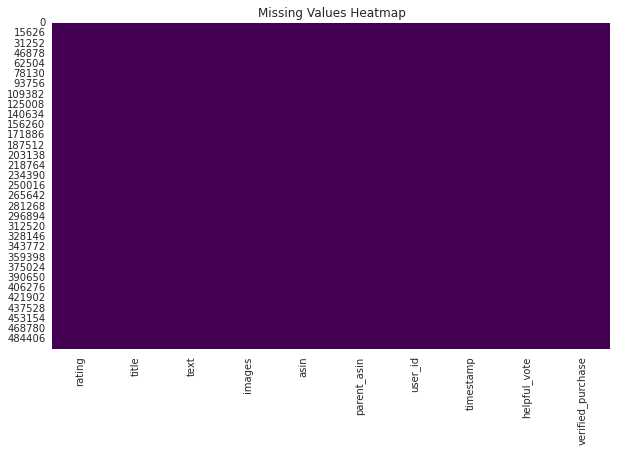

In [12]:
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Visualize missingness with a heatmap:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


Unique values in 'overall' (Ratings): [5 4 1 2 3 0]


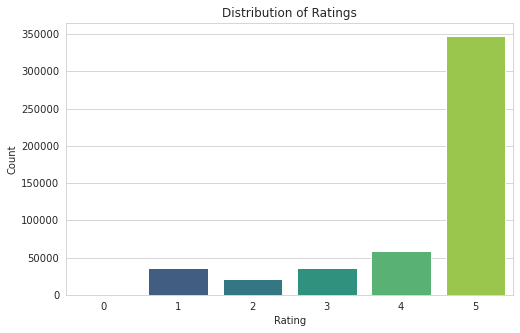

In [15]:
print("\nUnique values in 'overall' (Ratings):", df['rating'].unique())

# Countplot for the 'overall' column
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


Value Counts for 'verified':
 True     436838
False     63162
Name: verified_purchase, dtype: int64


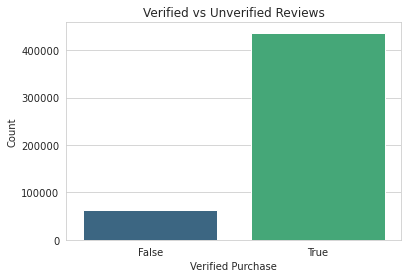

In [17]:
print("\nValue Counts for 'verified':\n", df['verified_purchase'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='verified_purchase', data=df, palette='viridis')
plt.title("Verified vs Unverified Reviews")
plt.xlabel("Verified Purchase")
plt.ylabel("Count")
plt.show()

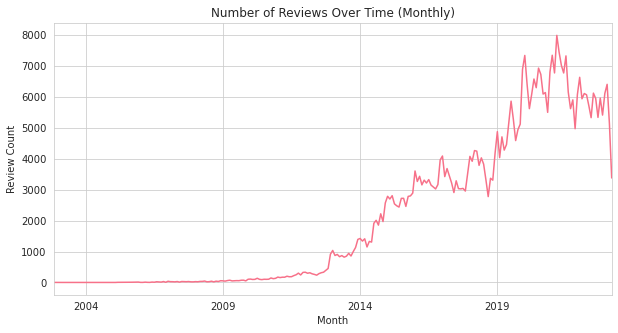

In [18]:
# Convert 'reviewTime' 
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Quick check of distribution over time 
df.set_index('timestamp', inplace=True)  # set time index to facilitate time-series plots
df.resample('M')['rating'].count().plot(figsize=(10,5))
plt.title("Number of Reviews Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.show()

# Reset index if needed for further analysis
df.reset_index(inplace=True)

In [20]:
df['text'] = df['text'].astype(str)  # Ensure it's string type

# Number of words in each review
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
print("\nWord Count Stats:\n", df['word_count'].describe())

# # Distribution of word counts
# plt.figure(figsize=(8,5))
# sns.histplot(df['word_count'], bins=100, kde=True, color='purple')
# plt.title("Distribution of Review Word Counts")
# plt.xlabel("Word Count")
# plt.ylabel("Frequency")
# plt.show()


Word Count Stats:
 count    500000.000000
mean         36.407876
std          52.551925
min           0.000000
25%           8.000000
50%          20.000000
75%          45.000000
max        3515.000000
Name: word_count, dtype: float64


## Review Distribution Analysis

Let's analyze the distribution of reviews across different dimensions:
1. Rating distribution
2. Verified vs unverified purchases
3. Temporal patterns
4. Review length analysis

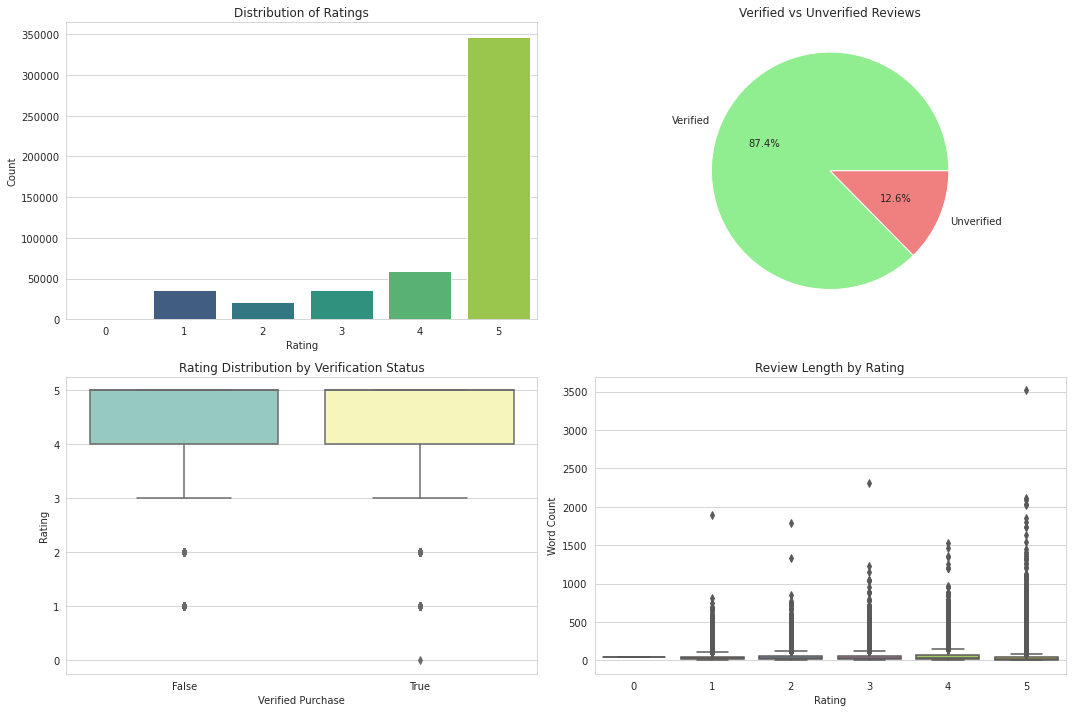

In [22]:
# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 10))

# 1. Rating Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='rating', data=df, palette='viridis')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")

# 2. Verified vs Unverified
plt.subplot(2, 2, 2)
verified_pct = df['verified_purchase'].value_counts(normalize=True) * 100
plt.pie(verified_pct, labels=['Verified', 'Unverified'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Verified vs Unverified Reviews")

# 3. Average Rating by Verification Status
plt.subplot(2, 2, 3)
sns.boxplot(x='verified_purchase', y='rating', data=df, palette='Set3')
plt.title("Rating Distribution by Verification Status")
plt.xlabel("Verified Purchase")
plt.ylabel("Rating")

# 4. Word Count vs Rating
plt.subplot(2, 2, 4)
sns.boxplot(x='rating', y='word_count', data=df, palette='Set2')
plt.title("Review Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")

plt.tight_layout()
plt.show()

## Temporal Analysis

Let's analyze how reviews and ratings change over time.

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

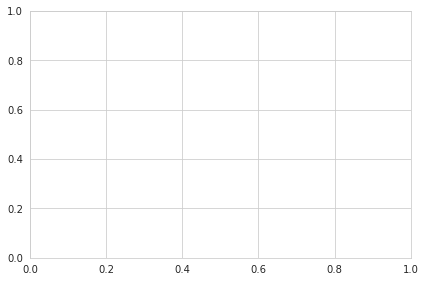

In [23]:
# Create multiple time-based visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Reviews per month
plt.subplot(2, 2, 1)
df.set_index('timestamp')['rating'].resample('M').count().plot()
plt.title("Number of Reviews Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")

# 2. Average rating over time
plt.subplot(2, 2, 2)
df.set_index('timestamp')['rating'].resample('M').mean().plot()
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")

# 3. Verified purchase ratio over time
plt.subplot(2, 2, 3)
verified_ratio = df.set_index('timestamp')['verified_purchase'].resample('M').mean()
verified_ratio.plot()
plt.title("Ratio of Verified Purchases Over Time")
plt.xlabel("Date")
plt.ylabel("Ratio of Verified Purchases")

# 4. Average word count over time
plt.subplot(2, 2, 4)
df.set_index('timestamp')['word_count'].resample('M').mean().plot()
plt.title("Average Review Length Over Time")
plt.xlabel("Date")
plt.ylabel("Average Word Count")

plt.tight_layout()
plt.show()

# Reset index
df.reset_index(drop=True, inplace=True)

## Text Analysis and Preprocessing

We'll now analyze the text content of reviews, including:
1. Word frequency analysis
2. Word clouds
3. Text preprocessing for sentiment analysis

In [21]:
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [14]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

Sample for faster processing... will have to batch (ssh into SuperCloud) for full dataset

In [15]:
df =df.sample(10000)

In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
    # 1. Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # 2. Lowercase
    text = text.lower()
    # 3. Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # 4. Tokenize
    tokens = word_tokenize(text)
    # 5. Remove non-alphabetic tokens and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply preprocessing to reviewText
df['tokens'] = df['reviewText'].astype(str).apply(preprocess_text)
# Apply preprocessing to summary
df['summarytokens'] = df['summary'].astype(str).apply(preprocess_text)

C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()
C:\Users\k_pow\AppData\Local\Temp\ipykernel_18688\2614998766.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [18]:
# Flatten list of all tokens
review_tokens = [word for tokens in df['tokens'] for word in tokens]

In [19]:
# Frequency distribution
freq_dist = nltk.FreqDist(review_tokens)
common_words = freq_dist.most_common(20)
print("\nTop 20 Frequent Words in review:")
for word, freq in common_words:
    print(word, ":", freq)


Top 20 Frequent Words in review:
good : 3006
like : 2746
taste : 2702
great : 2564
flavor : 2314
love : 1962
product : 1646
one : 1599
coffee : 1562
tea : 1498
use : 1153
make : 1149
really : 1011
would : 953
price : 952
get : 924
much : 871
time : 865
buy : 819
sugar : 795


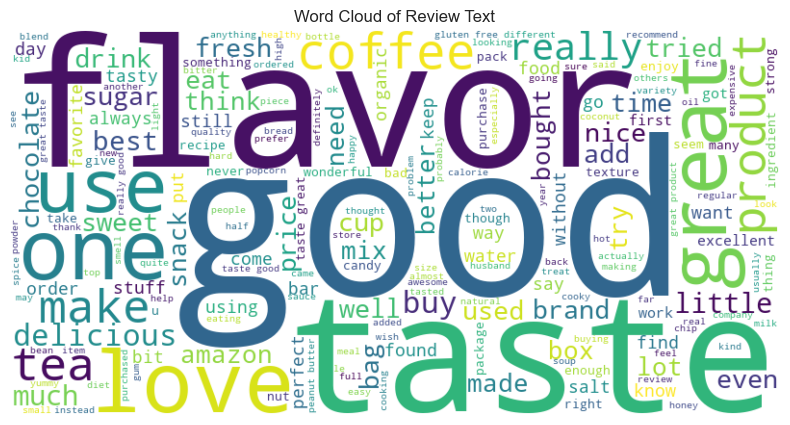

In [22]:
wordcloud_text = " ".join(review_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Review Text")
plt.show()

In [23]:
summary_tokens = [word for summarytokens in df['summarytokens'] for word in summarytokens]

In [24]:
# Frequency distribution
freq_dist = nltk.FreqDist(summary_tokens)
common_words = freq_dist.most_common(20)
print("\nTop 20 Frequent Words in review:")
for word, freq in common_words:
    print(word, ":", freq)


Top 20 Frequent Words in review:
star : 2551
five : 1996
great : 1133
good : 987
love : 507
taste : 474
best : 341
flavor : 339
like : 308
product : 307
coffee : 303
four : 274
tea : 264
delicious : 256
tasty : 200
one : 171
nice : 170
favorite : 166
excellent : 165
yummy : 165


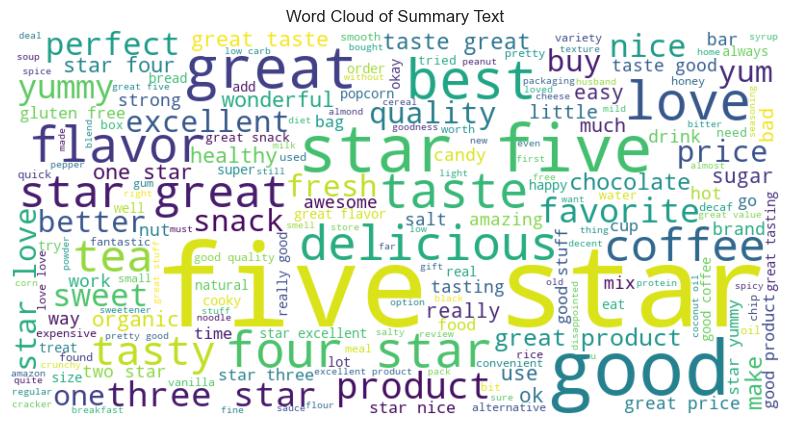

In [25]:
wordcloud_text = " ".join(summary_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Summary Text")
plt.show()

## Additional Text Analysis


Average Word Count by Rating:
overall
1    48.472554
2    51.082317
3    48.060606
4    50.217424
5    34.413398
Name: word_count, dtype: float64


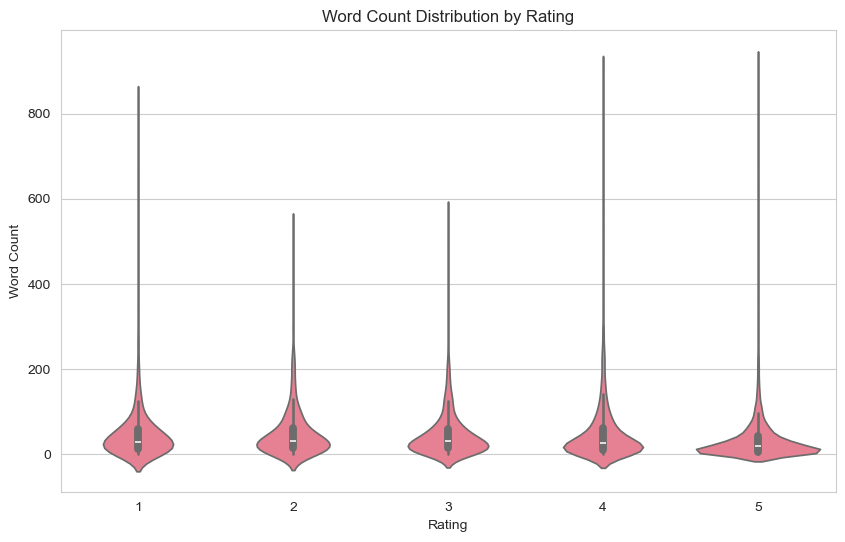

In [26]:
# Calculate average word count by rating
avg_words_by_rating = df.groupby('overall')['word_count'].mean()
print("\nAverage Word Count by Rating:")
print(avg_words_by_rating)

# Visualization of word count distribution by rating
plt.figure(figsize=(10, 6))
sns.violinplot(x='overall', y='word_count', data=df)
plt.title("Word Count Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Word Count")
plt.show()

## Save Processed DataFrame

Save the preprocessed and tokenized dataframe for future sentiment analysis.

In [27]:
# Save the processed dataframe
processed_df = df[['overall', 'verified', 'reviewTime', 'tokens', 'summarytokens', 'word_count']]
processed_df.to_pickle('processed_reviews.pkl')
print("Processed dataframe saved as 'processed_reviews.pkl'")

Processed dataframe saved as 'processed_reviews.pkl'
